In [30]:
import pandas as pd 
import wandb
import numpy as np
api = wandb.Api()

In [ ]:
metrics = ['test/result_acc/eval/'+ x for x in ['I', 'SS', 'LS', 'SL', 'LL']] + ['test/result_acc/avg']

In [ ]:
def latex(means, stds, transpose=False, prefix='', suffix=''):
    means = np.array(means)
    stds = np.array(stds)
    if transpose:
        means = np.transpose(means)
        stds = np.transpose(stds)
    for i in range(means.shape[0]):
        print(prefix, end='')
        for j in range(means.shape[1]):
            m = means[i,j]
            s = stds[i,j]
            print(f'{m:.1f}$\\pm${s:.1f}', end=' ')
        print(suffix)

# Symbol inputs

In [47]:
runs = api.runs("qli/HINT_main_res_symbol")
summary_list = [] 
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary = {'name': run.name}
    summary.update(run.summary._json_dict)
    summary.update(run.config)
    summary_list.append(summary)
df = {k: [x[k] for x in summary_list] for k in summary_list[0]}
df = pd.DataFrame(df)

In [70]:
means = df.groupby('model')[metrics].mean() * 100
stds = df.groupby('model')[metrics].std() * 100
display(means)
display(stds)
latex(means, stds, False)

,test/result_acc/eval/I,test/result_acc/eval/SS,test/result_acc/eval/LS,test/result_acc/eval/SL,test/result_acc/eval/LL,test/result_acc/avg
model,,,,,,
GRU,75.083500,67.845833,41.983333,10.405093,14.210000,41.697412
GRU_attn,76.536406,69.783333,44.236667,10.617284,15.910000,43.228228
LSTM,80.601202,75.450000,59.403333,11.481481,20.976667,49.571000
LSTM_attn,92.661991,90.283333,73.920000,12.195216,24.226667,58.641499
TRAN.opennmt,94.034736,91.062500,32.640000,11.462191,11.120000,47.267267
TRAN.relative,96.763527,95.154167,72.246667,11.770833,22.276667,59.499499
TRAN.relative_universal,97.685371,96.475000,76.140000,11.820988,22.450000,60.805091


,test/result_acc/eval/I,test/result_acc/eval/SS,test/result_acc/eval/LS,test/result_acc/eval/SL,test/result_acc/eval/LL,test/result_acc/avg
model,,,,,,
GRU,0.263268,0.294834,1.648100,0.164091,0.619919,0.559243
GRU_attn,0.432761,0.619013,1.517146,0.162175,1.247437,0.626946
LSTM,3.237062,3.632557,3.793802,0.211207,1.030162,2.358440
LSTM_attn,0.191782,0.669694,1.090275,0.121574,0.104083,0.398915
TRAN.opennmt,0.285937,0.543858,0.847880,0.054697,0.984733,0.469511
TRAN.relative,0.168563,0.083229,1.492559,0.113991,0.391067,0.393608
TRAN.relative_universal,0.276778,0.283119,3.532379,0.237856,1.546900,1.163029


75.1$\pm$0.3 67.8$\pm$0.3 42.0$\pm$1.6 10.4$\pm$0.2 14.2$\pm$0.6 41.7$\pm$0.6 
76.5$\pm$0.4 69.8$\pm$0.6 44.2$\pm$1.5 10.6$\pm$0.2 15.9$\pm$1.2 43.2$\pm$0.6 
80.6$\pm$3.2 75.5$\pm$3.6 59.4$\pm$3.8 11.5$\pm$0.2 21.0$\pm$1.0 49.6$\pm$2.4 
92.7$\pm$0.2 90.3$\pm$0.7 73.9$\pm$1.1 12.2$\pm$0.1 24.2$\pm$0.1 58.6$\pm$0.4 
94.0$\pm$0.3 91.1$\pm$0.5 32.6$\pm$0.8 11.5$\pm$0.1 11.1$\pm$1.0 47.3$\pm$0.5 
96.8$\pm$0.2 95.2$\pm$0.1 72.2$\pm$1.5 11.8$\pm$0.1 22.3$\pm$0.4 59.5$\pm$0.4 
97.7$\pm$0.3 96.5$\pm$0.3 76.1$\pm$3.5 11.8$\pm$0.2 22.4$\pm$1.5 60.8$\pm$1.2 


# Image inputs

In [89]:
def filter_run(summary):
    return 'train_size' not in summary or summary['train_size'] is None

runs = api.runs("qli/HINT_image")
summary_list = [] 
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary = {'name': run.name}
    summary.update(run.summary._json_dict)
    summary.update(run.config)
    if filter_run(summary):
        summary_list.append(summary)
df = {k: [x.get(k, '') for x in summary_list] for k in summary_list[0]}
df = pd.DataFrame(df)
print('number of runs:', len(summary_list))

number of runs: 21


In [90]:
means = df.groupby('model')[metrics].mean() * 100
stds = df.groupby('model')[metrics].std() * 100
display(means)
display(stds)
latex(means, stds, False)

,test/result_acc/eval/I,test/result_acc/eval/SS,test/result_acc/eval/LS,test/result_acc/eval/SL,test/result_acc/eval/LL,test/result_acc/avg
model,,,,,,
GRU,61.122244,52.700000,30.700000,9.116512,11.496667,32.868583
GRU_attn,65.267201,57.083333,31.400000,9.212963,11.866667,34.755470
LSTM,76.680027,71.216667,51.400000,10.582562,18.176667,45.521236
LSTM_attn,84.068136,79.700000,61.486667,11.261574,20.710000,51.391391
TRAN.opennmt,20.794923,9.287500,5.760000,1.392747,2.770000,8.133133
TRAN.relative,86.319305,83.041667,58.970000,10.798611,19.103333,51.476476
TRAN.relative_universal,89.138277,86.729167,65.060000,11.037809,20.103333,54.277849


,test/result_acc/eval/I,test/result_acc/eval/SS,test/result_acc/eval/LS,test/result_acc/eval/SL,test/result_acc/eval/LL,test/result_acc/avg
model,,,,,,
GRU,1.774679,2.210380,1.416792,0.284528,0.512868,1.214848
GRU_attn,2.590550,2.511111,2.565560,0.371273,1.117915,1.813930
LSTM,7.536811,9.598847,10.634345,0.810213,3.382637,6.411884
LSTM_attn,0.575346,0.420007,2.235091,0.098889,0.750267,0.791239
TRAN.opennmt,0.526442,0.316968,0.113578,0.421991,0.689420,0.350275
TRAN.relative,1.205962,1.748496,3.065991,0.284449,0.570993,1.373882
TRAN.relative_universal,0.631263,0.702043,2.550059,0.208440,1.045100,1.046762


61.1$\pm$1.8 52.7$\pm$2.2 30.7$\pm$1.4 9.1$\pm$0.3 11.5$\pm$0.5 32.9$\pm$1.2 
65.3$\pm$2.6 57.1$\pm$2.5 31.4$\pm$2.6 9.2$\pm$0.4 11.9$\pm$1.1 34.8$\pm$1.8 
76.7$\pm$7.5 71.2$\pm$9.6 51.4$\pm$10.6 10.6$\pm$0.8 18.2$\pm$3.4 45.5$\pm$6.4 
84.1$\pm$0.6 79.7$\pm$0.4 61.5$\pm$2.2 11.3$\pm$0.1 20.7$\pm$0.8 51.4$\pm$0.8 
20.8$\pm$0.5 9.3$\pm$0.3 5.8$\pm$0.1 1.4$\pm$0.4 2.8$\pm$0.7 8.1$\pm$0.4 
86.3$\pm$1.2 83.0$\pm$1.7 59.0$\pm$3.1 10.8$\pm$0.3 19.1$\pm$0.6 51.5$\pm$1.4 
89.1$\pm$0.6 86.7$\pm$0.7 65.1$\pm$2.6 11.0$\pm$0.2 20.1$\pm$1.0 54.3$\pm$1.0 


# Scaling law (data efficiency)

In [94]:
def filter_run(summary):
    if 'train_size' not in summary or summary['train_size'] is None:
        summary['train_size'] = 1
    if summary['model'] in ['TRAN.relative_universal', 'LSTM_attn']:
        return True
    return False

runs = api.runs("qli/HINT_image")
summary_list = [] 
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary = {'name': run.name}
    summary.update(run.summary._json_dict)
    summary.update(run.config)
    if filter_run(summary):
        summary_list.append(summary)
df = {k: [x.get(k, '') for x in summary_list] for k in summary_list[0]}
df = pd.DataFrame(df)
print('number of runs:', len(summary_list))

number of runs: 24


In [95]:
groupby = ['model', 'train_size']
means = df.groupby(groupby)[metrics].mean() * 100
stds = df.groupby(groupby)[metrics].std() * 100
display(means)
display(stds)

test/result_acc/eval/I  \
model                   train_size                           
LSTM_attn               0.25                     78.480294   
                        0.50                     81.977288   
                        0.75                     82.351369   
                        1.00                     84.068136   
TRAN.relative_universal 0.25                     86.138945   
                        0.50                     89.375418   
                        0.75                     86.152305   
                        1.00                     89.138277   

                                    test/result_acc/eval/SS  \
model                   train_size                            
LSTM_attn               0.25                      72.533333   
                        0.50                      77.587500   
                        0.75                      77.704167   
                        1.00                      79.700000   
TRAN.relative_universal 0.25                      83.216667   
                        0.50                      87.370833   
                        0.75                      83.595833   
                        1.00                      86.729167   

                                    test/result_acc/eval/LS  \
model                   train_size                            
LSTM_attn               0.25                      52.313333   
                        0.50                      58.983333   
                        0.75                      58.920000   
                        1.00                      61.486667   
TRAN.relative_universal 0.25                      57.206667   
                        0.50                      64.770000   
                        0.75                      61.390000   
                        1.00                      65.060000   

                                    test/result_acc/eval/SL  \
model                   train_size                            
LSTM_attn               0.25                      10.513117   
                        0.50                      10.929784   
                        0.75                      11.076389   
                        1.00                      11.261574   
TRAN.relative_universal 0.25                      10.559414   
                        0.50                      11.091821   
                        0.75                      10.601852   
                        1.00                      11.037809   

                                    test/result_acc/eval/LL  \
model                   train_size                            
LSTM_attn               0.25                      18.573333   
                        0.50                      20.290000   
                        0.75                      20.386667   
                        1.00                      20.710000   
TRAN.relative_universal 0.25                      18.060000   
                        0.50                      19.936667   
                        0.75                      19.156667   
                        1.00                      20.103333   

                                    test/result_acc/avg  
model                   train_size                       
LSTM_attn               0.25                  46.400686  
                        0.50                  49.892750  
                        0.75                  50.027170  
                        1.00                  51.391391  
TRAN.relative_universal 0.25                  50.821536  
                        0.50                  54.350779  
                        0.75                  52.029887  
                        1.00                  54.277849

test/result_acc/eval/I  \
model                   train_size                           
LSTM_attn               0.25                      2.719040   
                        0.50                      1.326145   
                        0.75                      3.424998   
                        1.00                      0.575346   
TRAN.relative_universal 0.25                      0.984840   
                        0.50                      1.079951   
                        0.75                      0.765271   
                        1.00                      0.631263   

                                    test/result_acc/eval/SS  \
model                   train_size                            
LSTM_attn               0.25                       2.216146   
                        0.50                       1.846407   
                        0.75                       4.966990   
                        1.00                       0.420007   
TRAN.relative_universal 0.25                       0.971495   
                        0.50                       1.318873   
                        0.75                       0.788227   
                        1.00                       0.702043   

                                    test/result_acc/eval/LS  \
model                   train_size                            
LSTM_attn               0.25                       1.795671   
                        0.50                       1.361372   
                        0.75                       4.577434   
                        1.00                       2.235091   
TRAN.relative_universal 0.25                       0.896735   
                        0.50                       2.132534   
                        0.75                       1.696732   
                        1.00                       2.550059   

                                    test/result_acc/eval/SL  \
model                   train_size                            
LSTM_attn               0.25                       0.446215   
                        0.50                       0.133646   
                        0.75                       0.278500   
                        1.00                       0.098889   
TRAN.relative_universal 0.25                       0.191001   
                        0.50                       0.103737   
                        0.75                       0.111616   
                        1.00                       0.208440   

                                    test/result_acc/eval/LL  \
model                   train_size                            
LSTM_attn               0.25                       0.505206   
                        0.50                       0.297153   
                        0.75                       0.891983   
                        1.00                       0.750267   
TRAN.relative_universal 0.25                       0.180831   
                        0.50                       0.520801   
                        0.75                       0.497024   
                        1.00                       1.045100   

                                    test/result_acc/avg  
model                   train_size                       
LSTM_attn               0.25                   1.502733  
                        0.50                   0.813267  
                        0.75                   2.786539  
                        1.00                   0.791239  
TRAN.relative_universal 0.25                   0.567113  
                        0.50                   1.022926  
                        0.75                   0.728538  
                        1.00                   1.046762

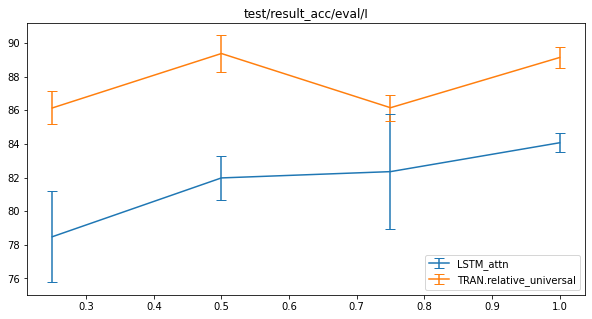

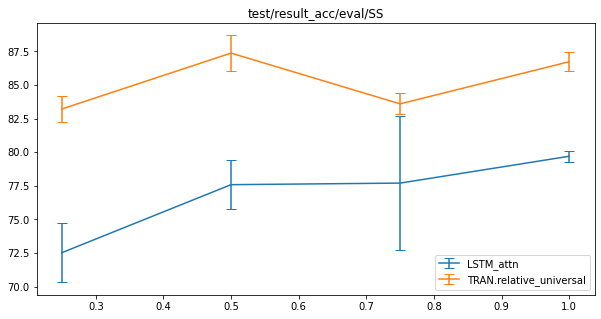

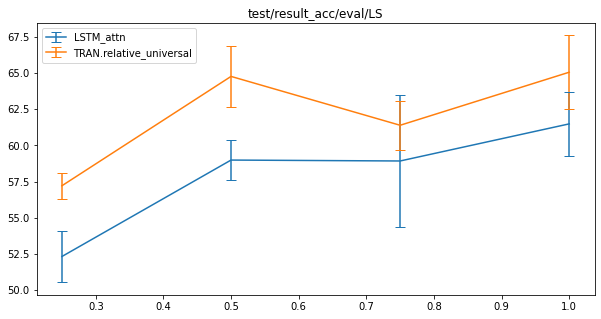

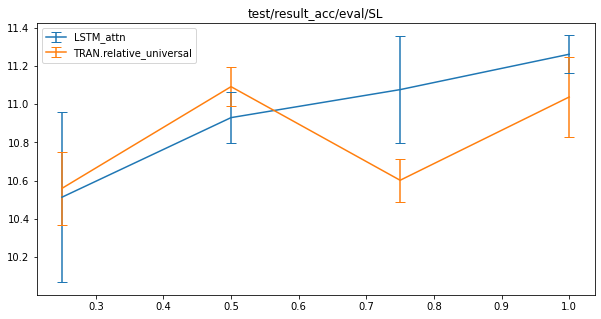

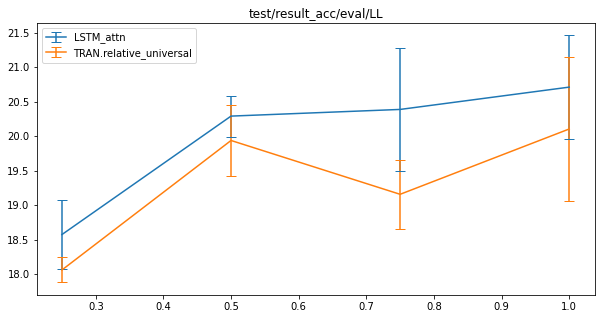

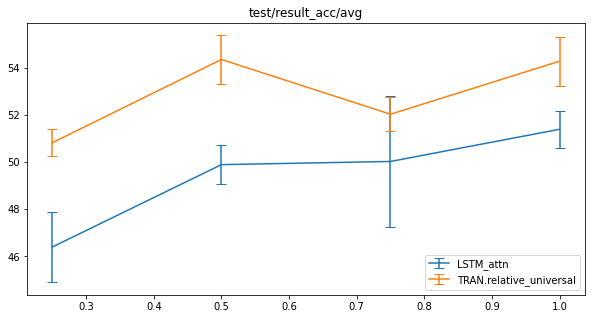

In [146]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

groupby = ['model', 'train_size']
df_gb = df.groupby(groupby)
labels = sorted(list(set(df[groupby[0]])))
X = sorted(list(set(df[groupby[1]])))

for m in metrics:
    plt.figure(figsize=(10, 5))
    for l in labels:
        M = []
        S = []
        for x in X:
            data = df_gb.get_group((l, x))[m]
            mean = data.mean() * 100
            std = data.std() * 100
            M.append(mean)
            S.append(std)
        
        plt.errorbar(X, M, yerr=S, label=l, capsize=5)
    plt.title(m)
    plt.legend()
    plt.show()

In [133]:
name_mapping = {'LSTM_attn': 'LSTM w/ att', 'TRAN.relative_universal': 'Transformer rel. uni.'}
name_mapping.update({'test/result_acc/avg': 'Test avg.'})

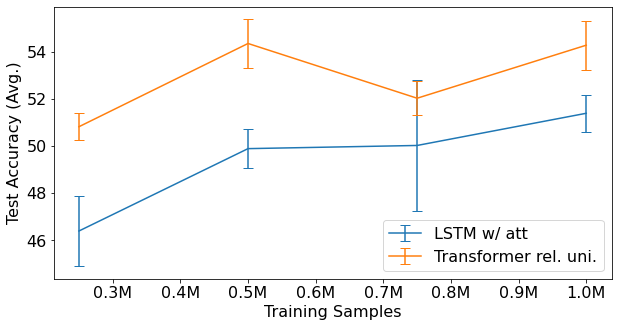

In [155]:
m = 'test/result_acc/avg'
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams['font.size'] = '16'

for l in labels:
    M = []
    S = []
    for x in X:
        data = df_gb.get_group((l, x))[m]
        mean = data.mean() * 100
        std = data.std() * 100
        M.append(mean)
        S.append(std)
    l = name_mapping[l]
    ax.errorbar(X, M, yerr=S, label=l, capsize=5)
plt.legend()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xlabel('Training Samples')
plt.ylabel('Test Accuracy (Avg.)')

fmt = lambda x, pos: f'{x:.1f}M'
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
plt.savefig('figures/scaling_law.png', dpi=300, bbox_inches='tight')
plt.show()

In [145]:
np.array(X) * 10E6

array([ 2500000.,  5000000.,  7500000., 10000000.])